# TP 3 : Classification avec R

## 1. Données `body` allégées

Nous considérons une nouvelles fois les données `body`.

In [83]:
data_body <- read.table("data/body.csv", header=TRUE, sep=";", dec=",", row.names=1)
head(data_body)

,T.epaule,T.poitrine,T.taille,Masse,Taille
H1,106.2,89.5,71.5,65.6,174.0
H2,110.5,97.0,79.0,71.8,175.3
H3,115.1,97.5,83.2,80.7,193.5
H4,104.5,97.0,77.8,72.6,186.5
H5,107.5,97.5,80.0,78.8,187.2
H6,119.8,99.9,82.5,74.8,181.5


### 1.1 Classification ascendante hiérarchique

Grâce à la fonction `dist()`, il est possible de calculer les distances euclidiennes entre toutes les paires d'individus.

In [5]:
distances <- dist(data_body)

<div class="alert alert-block alert-success">
    Quelle est la longueur de l'objet créé ? À quoi correspond cette valeur ?
</div>

In [7]:
length(distances) # le nombre de distances entre des paires de points 2 à 2 distincts

[1] 190

La fonction `hclust()` permet de mettre en oeuvre une classification ascendante hiérarchique à partir de l'objet `distances` et le dendrogramme correspondant s'affiche avec `plot()`.

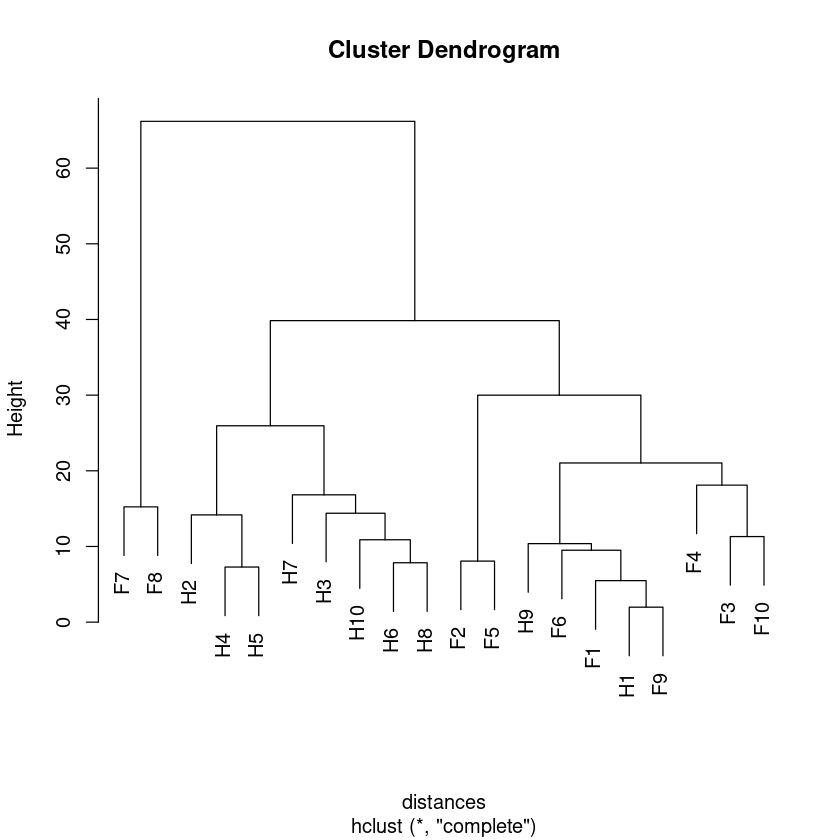

In [9]:
cah_body <- hclust(distances)
plot(cah_body)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Quel critère d'agglomération est utilisé par défaut par la fonction <code>hclust()</code> ?</li>
        <li>Mettre en oeuvre une classification ascendante hiérarchique en utilisant le critère de Ward comme critère d'agglomération.</li>
        <li>Représenter le dendrogramme associé aux résultats de cette classification.</li>
        <li>En utilisant <code>cah_body&dollar;height</code>, proposer un nombre de groupes raisonnable pour répartir les individus ?</li>
        <li>Utiliser la fonction <code>cutree()</code> avec le nombre de groupes souhaités pour associer chaque individu à un groupe. Les groupes peuvent être visualisés sur le dendrogramme en utilisant la fonction <code>rect.hclust()</code> et l'option <code>border=</code> pour les couleurs.<br>
            <center><img src="img/cah_body.png"></center></li>
        <li>Calculer une ACP des données <code>body</code> et représenter les individus dans le plan principal en donnant une couleur identique aux individus d'un même groupe de votre classification.<br>
            <center><img src="img/cah_acp_body.png"></center></li>
    </ol>
</div>

In [11]:
# À FAIRE
help(hclust) # c'est le critère de similitude (en l'occurence ici la distance) maximale

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


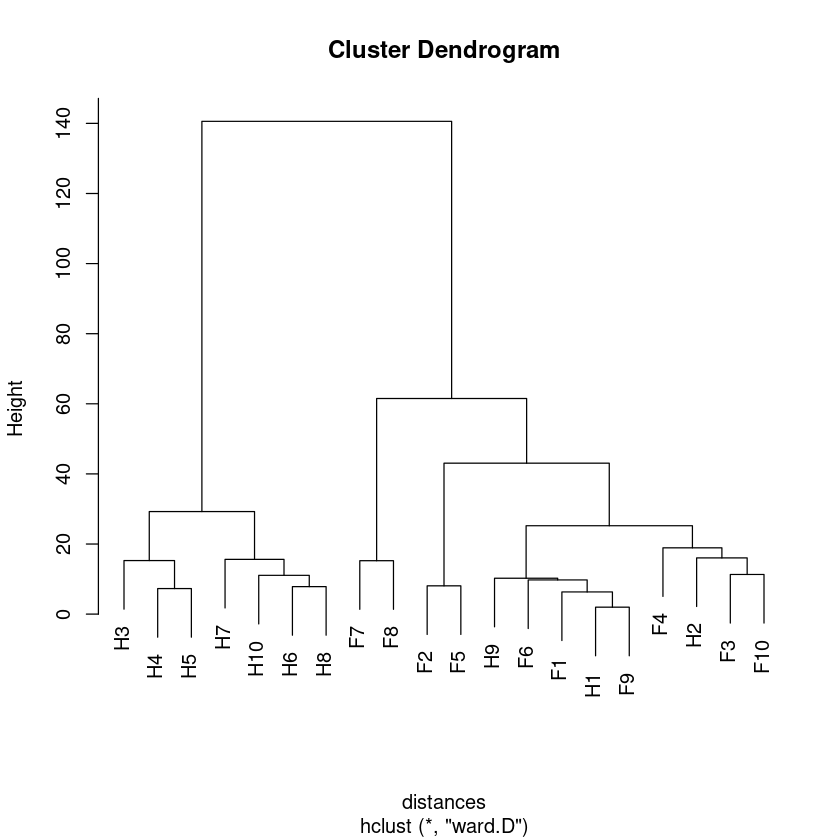

In [13]:
cah_body_ward <- hclust(distances, method="ward.D")
plot(cah_body_ward)

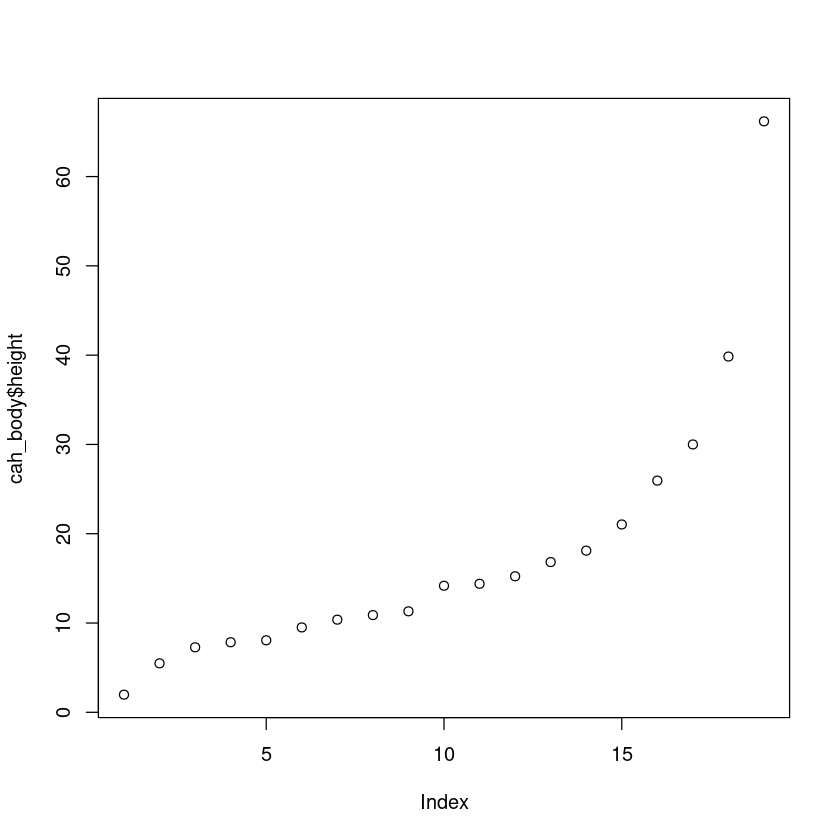

In [34]:
plot(cah_body$height) # 4

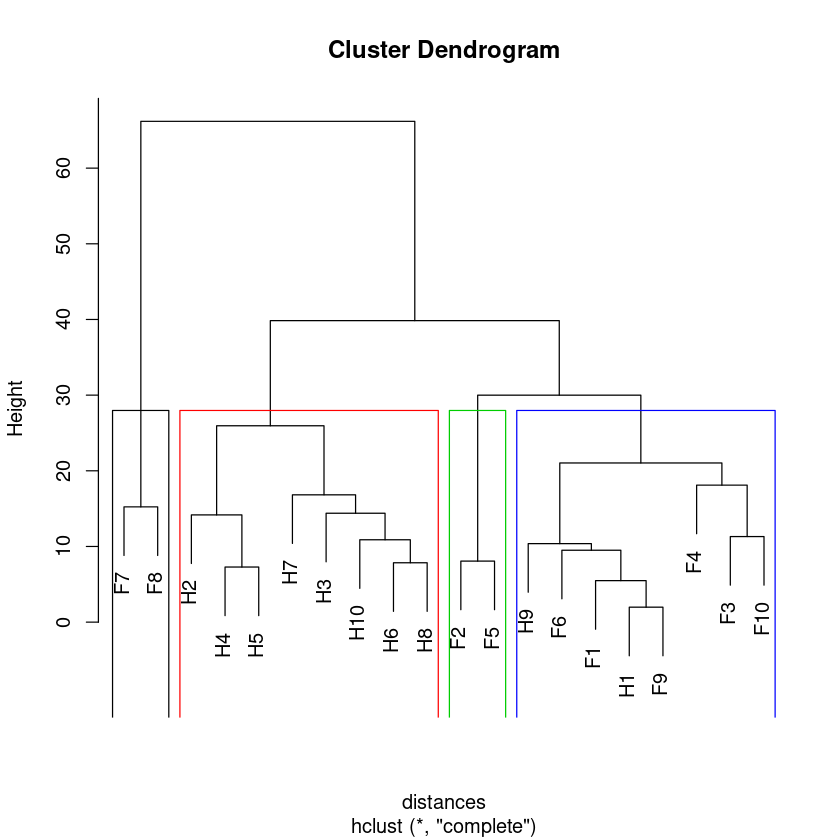

In [62]:
classif_cah <- cutree(cah_body,k=4)
plot(cah_body)
rect.hclust(cah_body,k=4,border=c(1,2,3,4))

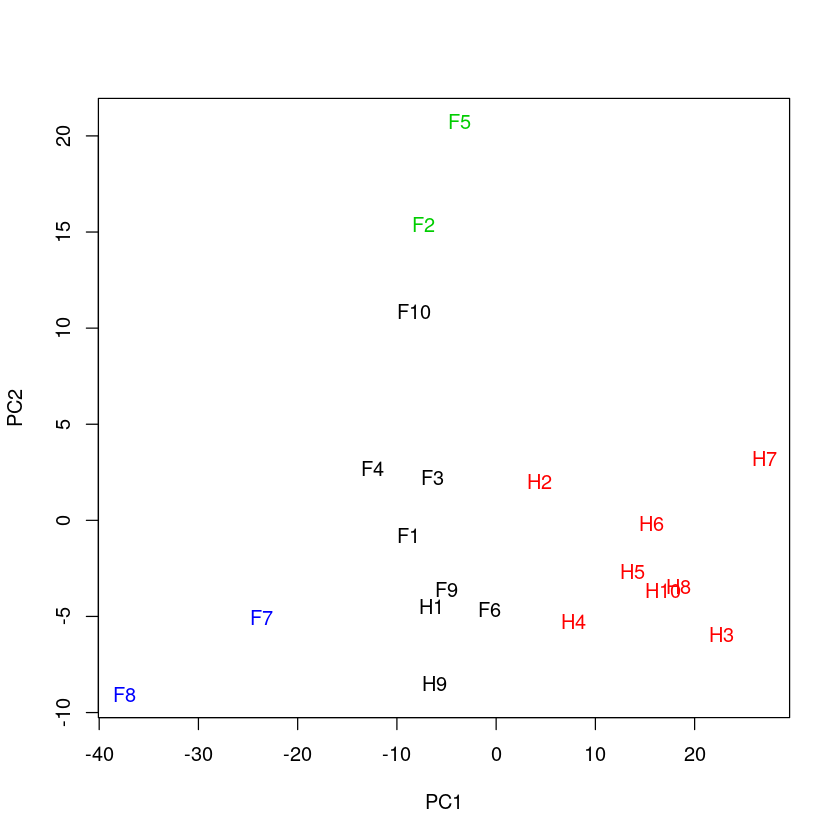

In [63]:
acp_body <- prcomp(data_body)
plot(acp_body$x,type="n")
text(acp_body$x,rownames(data_body),col=classif_cah)

### 1.2 K-means

Pour réaliser un algorithme K-means, il est possible d'utiliser la fonction `kmeans()` avec l'option `centers=` pour définir un nombre entier de groupes.

In [65]:
# Exemple de K-means à 4 groupes
kmeans_body_1 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le premier K-means :\n")
print(kmeans_body_1$cluster)

# Un autre exemple de K-means à 4 groupes
kmeans_body_2 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le second K-means :\n")
print(kmeans_body_2$cluster)

Groupes des individus pour le premier K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  2   1   4   1   1   4   4   4   2   4   2   3   3   2   3   1   2   2   2   3 
Groupes des individus pour le second K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  4   2   1   2   2   1   1   1   4   1   4   3   4   3   3   4   3   3   4   3 


<div class="alert alert-block alert-success">
    Expliquer pourquoi les résultats obtenus sont différents.
</div>

In [67]:
# Les centres sont différents par une initialisation aléatoire des centres au début.

Il est possible de construire la table de contingence qui croise les effectifs des 4 groupes obtenus dans les 2 cas avec la fonction `table()`.

In [69]:
table(kmeans_body_1$cluster, kmeans_body_2$cluster, dnn=c("kmeans1", "kmeans2"))

       kmeans2
kmeans1 1 2 3 4
      1 0 3 0 1
      2 0 0 3 4
      3 0 0 3 1
      4 5 0 0 0

<div class="alert alert-block alert-success">
    Croiser également l'un des résultats obtenus avec les groupes issus de la classification ascendante hiérarchique.
</div>

In [71]:
table(kmeans_body_1$cluster, classif_cah, dnn=c("kmeans1","cah"))

       cah
kmeans1 1 2 3 4
      1 1 3 0 0
      2 5 0 0 2
      3 2 0 2 0
      4 0 5 0 0

Afin de pallier l'aspect aléatoire de l'algorithme K-means et de stabiliser le résultat d'une classification ascendante hiérarchique, nous pouvons imposer les centres initiaux du K-means comme étant ceux donnés par les groupes de la CAH.

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer les barycentres des classes issues de la classification hiérarchique ascendante et stocker ces résultats en ligne dans une matrice à 5 colonnes.</li>
        <li>Passer cette matrice à l'option <code>centers=</code> de la fonction <code>kmeans()</code>. Est-ce que le résultat est encore aléatoire ?</li>
        <li>Comparer les résultats de cette classification avec ceux de la classification ascendante hiérarchique sous forme d'une table puis sous forme graphique dans le plan principal.</li>
    </ol>
</div>

In [85]:
# À FAIRE
data_body_kmeans <- data_body
data_body_kmeans$classif_cah = classif_cah
data_body_kmeans
barycentres <- aggregate(data_body, list(data_body_kmeans$classif_cah), FUN=mean)
barycentres

,T.epaule,T.poitrine,T.taille,Masse,Taille,classif_cah
H1,106.2,89.5,71.5,65.6,174.0,1
H2,110.5,97.0,79.0,71.8,175.3,2
H3,115.1,97.5,83.2,80.7,193.5,2
H4,104.5,97.0,77.8,72.6,186.5,2
H5,107.5,97.5,80.0,78.8,187.2,2
H6,119.8,99.9,82.5,74.8,181.5,2
H7,123.5,106.9,82.0,86.4,184.0,2
H8,120.4,102.5,76.8,78.4,184.5,2
H9,111.0,91.0,68.5,62.0,175.0,1
H10,119.5,93.5,77.5,81.6,184.0,2


Group.1,T.epaule,T.poitrine,T.taille,Masse,Taille
1,105.6125,92.1375,72.65,66.2500,171.0125
2,115.1000,98.9750,79.85,78.1375,184.5625
3,102.1000,94.7500,82.80,76.1500,158.7500
4,95.6000,82.7000,60.70,52.0500,162.5500


In [90]:
kmeans_stable <- kmeans(data_body,centers=barycentres[,2:6])
kmeans_stable$cluster

H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   3

In [94]:
comparaison_kmeans_cah = data.frame(kmeans_stable$cluster,classif_cah)
comparaison_kmeans_cah

,kmeans_stable.cluster,classif_cah
H1,1,1
H2,1,2
H3,2,2
H4,2,2
H5,2,2
H6,2,2
H7,2,2
H8,2,2
H9,1,1
H10,2,2


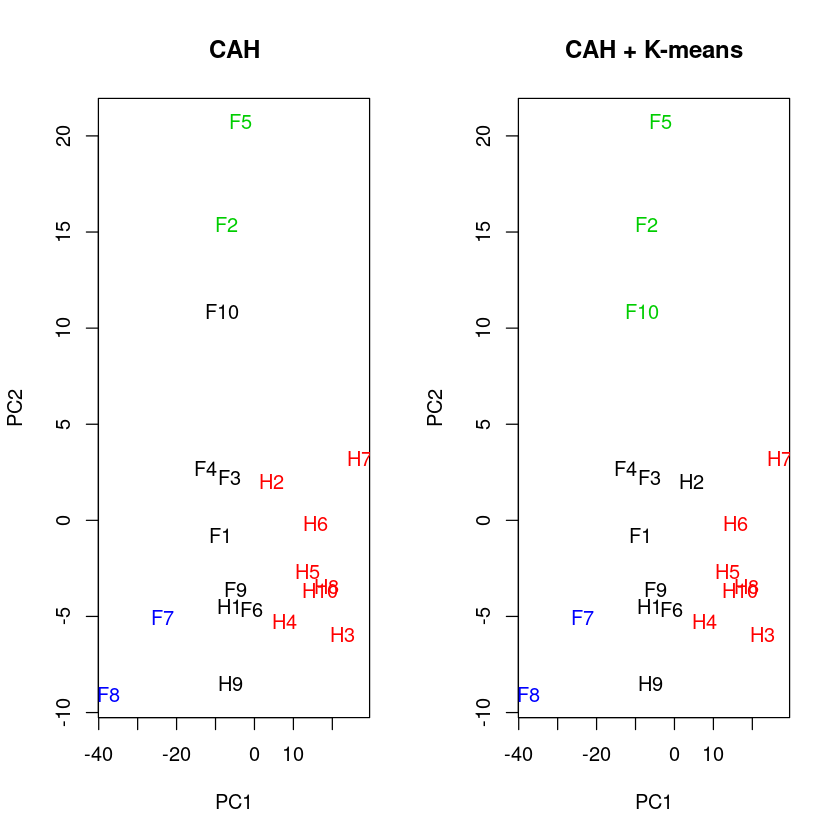

In [100]:
par(mfrow=c(1,2))
plot(acp_body$x,type="n", main = "CAH")
text(acp_body$x,rownames(data_body),col=classif_cah)
plot(acp_body$x,type="n", main = "CAH + K-means")
text(acp_body$x,rownames(data_body),col=kmeans_stable$cluster)

## 2. Données `body` complètes

Les données sont consituées de 24 variables quantitatives (diamètres, circonférence, âge, taille, poids, ...) mesurées chez 507 individus hommes et femmes (le sexe étant précisé dans la variable `gender`).

In [102]:
data_body_full <- read.table("data/data-body.csv", sep=";", dec=",", header=TRUE)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification ascendante hiérarchique (distance euclidienne et critère de Ward) sur les individus et représenter le dendrogramme associé.</li>
        <li>En combien de groupes classeriez-vous les individus ?</li>
        <li>Comparer les groupes de la classification à la variable <code>gender</code> à l'aide d'une table.</li>
        <li>Proposer plusieurs façons de caractériser chacun des groupes de la classification (individus moyens par groupe, ACP, ...).</li>
    </ol>
</div>

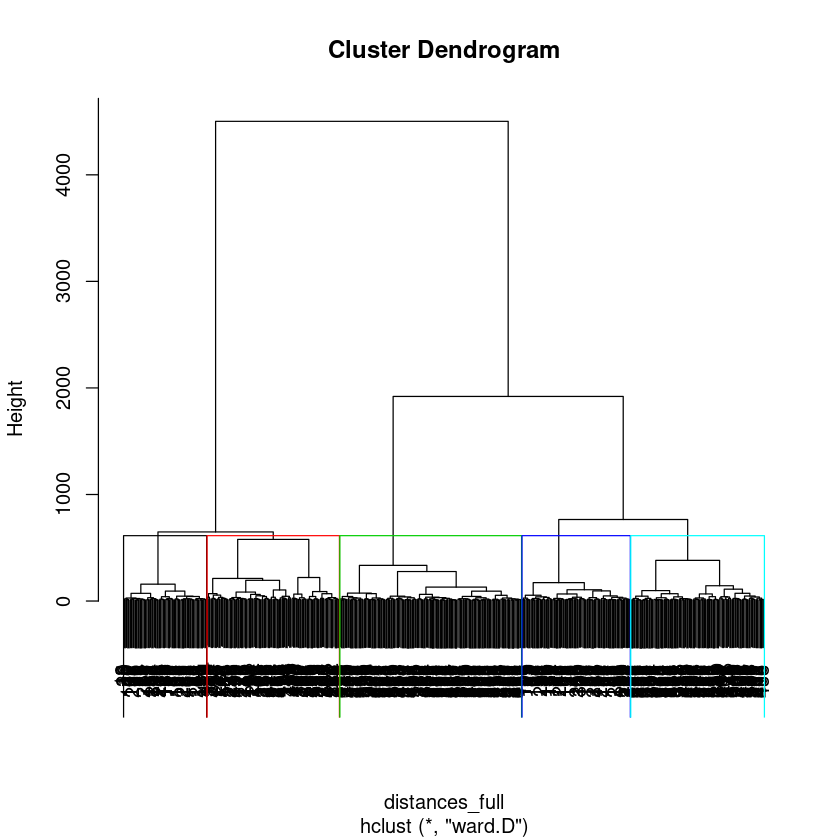

In [116]:
# À FAIRE
k <- 5

distances_full <- dist(data_body_full[,1:24])
cah_body_full <- hclust(distances_full,method="ward.D")
plot(cah_body_full) # 4 ou 5 à vue de nez
classif_cah_body_full <- cutree(cah_body_full,k)
rect.hclust(cah_body_full,k,border=seq(from=1,to=k))

In [117]:
table_comparaison = data.frame(data_body_full[,25],classif_cah_body_full)
table_comparaison

data_body_full...25.,classif_cah_body_full
M,1
M,1
M,2
M,1
M,2
M,2
M,2
M,2
M,1
M,2


In [118]:
# Individu moyen par classe
data_body_full_kmeans <- data_body_full[,1:24]
data_body_full_kmeans$classif_cah = classif_cah_body_full
# data_body_full_kmeans
barycentres_full <- aggregate(data_body_full[,1:24], list(data_body_full_kmeans$classif_cah), FUN=mean)
barycentres_full

Group.1,biacromial,pelvic.breadth,bitrochanteric,chest.depth,chest.diam,elbow.diam,wrist.diam,knee.diam,ankle.diam,...,thigh.girth,bicep.girth,forearm.girth,knee.girth,calf.girth,ankle.girth,wrist.girth,age,weight,height
1,40.81860,27.00233,31.36860,19.30581,28.78605,14.01512,10.931395,19.08372,14.35000,...,53.95000,32.86279,27.36395,35.72326,35.66047,22.13140,16.73605,27.31512,69.53372,174.7081
2,41.93182,28.38182,33.07576,21.23939,30.55758,14.89394,11.487879,20.05606,15.12576,...,58.62121,36.02273,29.32424,38.10000,38.28636,23.93333,17.70000,25.31364,83.20606,182.7500
3,40.86190,29.29238,33.56762,21.88857,30.60476,14.42857,11.273333,19.79619,14.71429,...,58.80381,34.78762,28.20857,38.32095,38.12476,23.58190,17.19238,41.06000,83.48952,175.8314
4,37.11226,28.37547,32.38585,18.38868,26.72736,12.72264,10.131132,18.57547,13.39623,...,59.99340,29.42170,24.54811,36.62642,36.18868,21.85094,15.41226,28.41321,66.34057,167.5566
5,35.93819,26.60347,30.38819,16.93056,25.30347,12.04444,9.647222,17.53125,12.71736,...,54.05208,26.58264,22.91944,33.76389,33.74236,20.54583,14.68750,27.40903,54.08194,162.9181


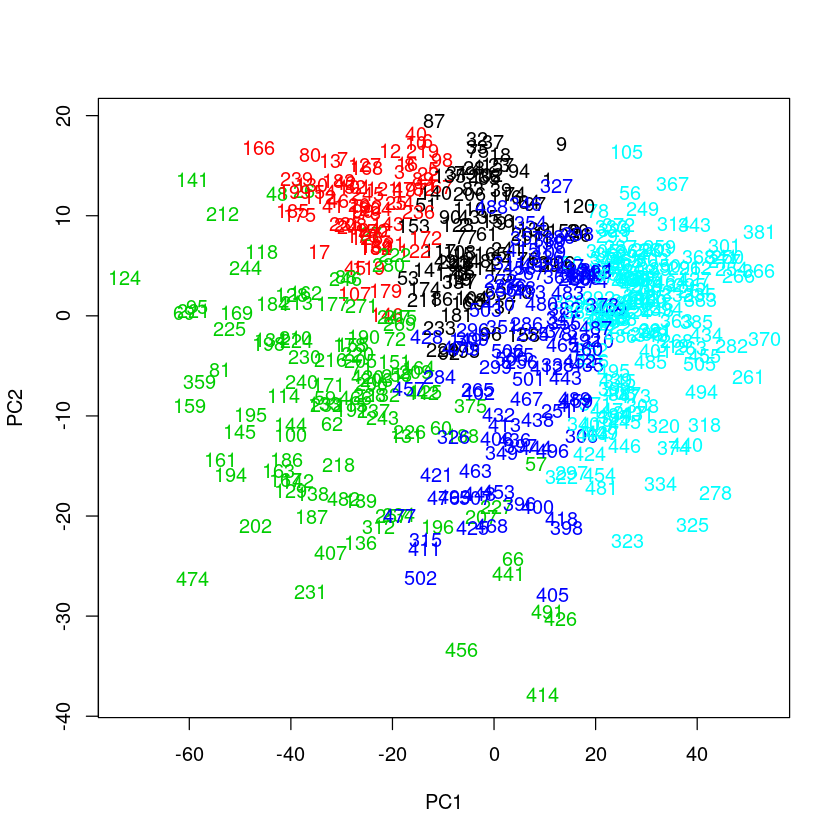

In [120]:
# ACP
acp_body_full <- prcomp(data_body_full[,1:24])
plot(acp_body_full$x,type="n")
text(acp_body_full$x,rownames(data_body_full),col=classif_cah_body_full)